# Threshold simulation for CSS codes

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
import json

## Example: Steane Codes [[7,1,3]]

In [52]:
#data = json.load(open('tmp.json'))
data = json.load(open('steane2.json'))
data['data_map']
data

{'data_map': [[0.001, 0.0],
  [0.011, 0.0014],
  [0.020999999999999998, 0.0088],
  [0.031, 0.0186],
  [0.041, 0.0294],
  [0.051000000000000004, 0.0445],
  [0.061000000000000006, 0.0593],
  [0.07100000000000001, 0.0782],
  [0.081, 0.0946],
  [0.091, 0.105],
  [0.10099999999999999, 0.1328],
  [0.11099999999999999, 0.1511],
  [0.12099999999999998, 0.1729]],
 'e_try': 10000,
 'note': 'Steane Codes [[7,1,3]]',
 'num_data': 13}

In [53]:
def data2plot(data_columns):
    p_qubit=[]
    p_block=[]
    for pair in data_columns:
        p_qubit.append(pair[0])
        p_block.append(pair[1])
    return p_qubit,p_block
p_qubit,p_block = data2plot(data['data_map'])

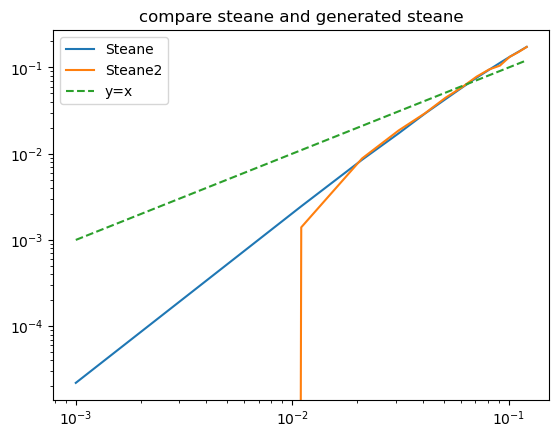

In [66]:
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane')

data = json.load(open('result/steane2.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane2')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')

plt.title('compare steane and generated steane')
plt.legend()

It looks like the two steane codes have the same distance scaling as d=3
- [ ] to check better plots with more sampling date
- [ ] print parity check and compare

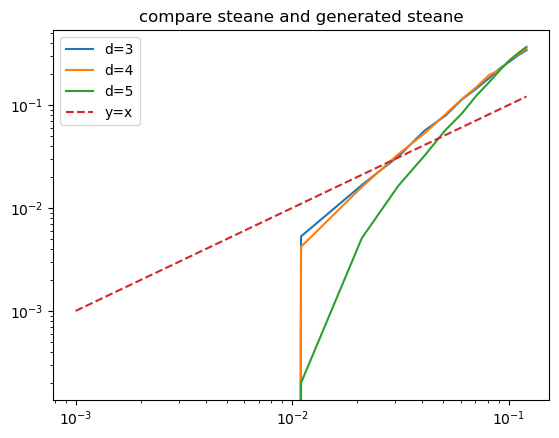

In [71]:
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/d3.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='d=3')

data = json.load(open('result/d4.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='d=4')

data = json.load(open('result/d5.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='d=5')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')

plt.title('compare steane and generated steane')
plt.legend()

- distance 5 looks okay
- d=3 and d=4 need better data


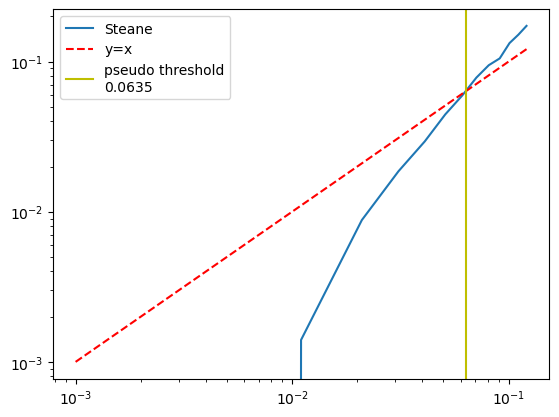

In [54]:
plt.yscale('log'),plt.xscale('log')

plt.plot(p_qubit,p_block,label='Steane')

h = np.array(p_qubit)
# red dashes, blue squares and green triangles
plt.plot(h, h, 'r--',label='y=x')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
plt.legend()

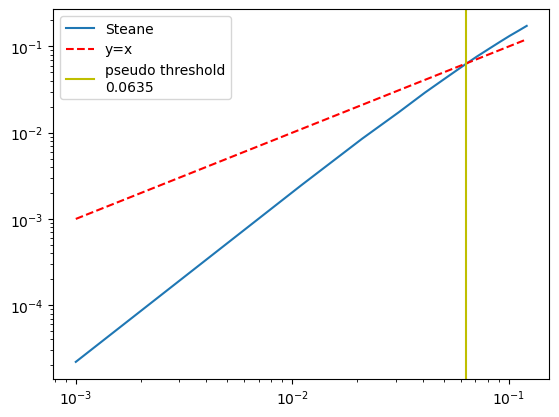

In [48]:
plt.yscale('log'),plt.xscale('log')

plt.plot(p_qubit,p_block,label='Steane')

h = np.array(p_qubit)
# red dashes, blue squares and green triangles
plt.plot(h, h, 'r--',label='y=x')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
plt.legend()

Observations:
- pseudo threhold about 0.0635
- distance = 3?

TODO:
- [ ] add `min weight decoder`, compare time and decoding rate

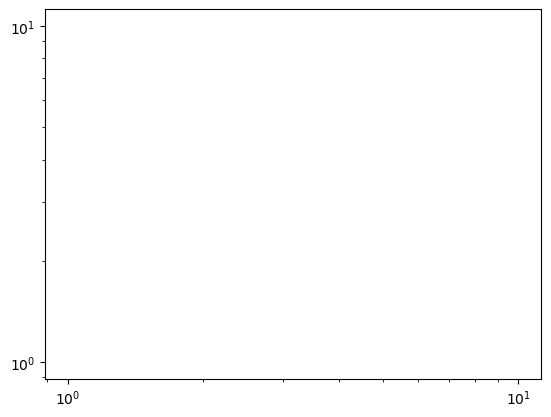

In [47]:
plt.yscale('log'),plt.xscale('log')
plt.show()

## Appendix
### sample plot use `matplotlib`

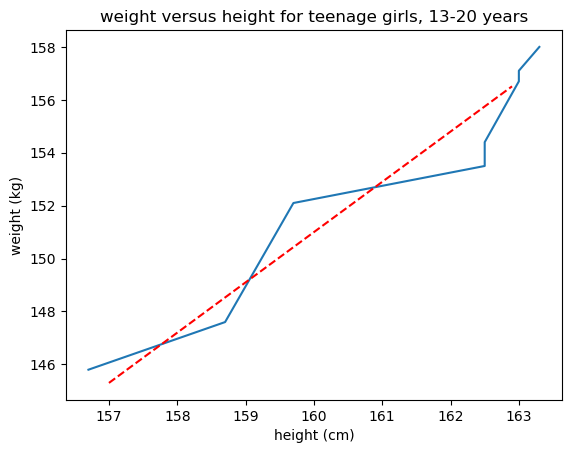

In [5]:

weight = [45.8,47.6,52.1,53.5,54.4,56.7,57.1,58.0]
weight = [145.8,147.6,152.1,153.5,154.4,156.7,157.1,158.0]
height = [156.7,158.7, 159.7,162.5,162.5,163,163,163.3]

plt.plot(height,weight)
plt.title("weight versus height for teenage girls, 13-20 years")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# plot a function

h = np.arange(157., 163., .1)
w = 1.9 * h -153
# red dashes, blue squares and green triangles
plt.plot(h, w, 'r--')

# this is a mimic of linear regression/linear fit